In [1]:
%matplotlib inline

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20, 10)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predicting Sofia real estate prices

The project is focused on predicting real estate prices in Sofia, Bulgaria. With the growing interest in the real estate market and increasing complexity of property values, our goal is to leverage historical data to forecast future prices. Understanding and predicting real estate prices can provide valuable insights for buyers, sellers, investors, and policymakers.

The real estate market in Sofia, Bulgaria, is constantly changing. Understanding how property prices are influenced and predicting future values is important for everyone involved in buying, selling, or investing in real estate. This project aims to forecast property prices in Sofia using historical data to help people make better decisions in the real estate market.

By analyzing past transactions and key factors that affect property values—such as location, size, and property features—we will develop a model to predict future prices. My goal is to provide clear, accurate predictions that can guide buyers, sellers, and investors in making informed choices.

This project is a significant step towards improving my understanding of Sofia’s real estate market. With the help of data-driven insights, I hope to make it easier for people to navigate the complexities of property pricing and find valuable opportunities in the market.

### The goals of the project:
- To understand the key drivers of real estate prices in Sofia.
- To build and evaluate a machine learning model that can predict property prices.

### Why this problem is important?

__1. Importance for Investors__: <br/>
- Maximizing Returns: Real estate is one of the most significant and stable forms of investment. Investors rely on accurate price predictions to identify undervalued properties, time their purchases, and decide on the most profitable resale opportunities. By predicting future prices, investors can optimize their portfolios, maximize returns, and mitigate risks.
- Market Timing: For investors, knowing when to buy or sell is crucial. Accurate price predictions can help investors time the market effectively, allowing them to buy properties before prices increase and sell before a downturn. This timing can significantly affect the profitability of real estate investments.
- Diversification and Risk Management: Understanding price trends in different neighborhoods or property types allows investors to diversify their portfolios. They can spread their investments across various segments of the market, reducing the risk of exposure to price volatility in any single area.

__2. Importance for Homebuyers:__ <br/>
- Affordability and Budgeting: For most people, buying a home is the largest financial commitment they will make in their lifetime. Predicting future prices helps homebuyers understand market trends, ensuring they purchase at the right time to get the best value for their money. It also helps them budget accurately for future financial planning, such as mortgage payments and maintenance costs.
- Avoiding Overpayment: Accurate predictions can prevent homebuyers from overpaying in a competitive market. By understanding the fair value of properties, buyers can make informed decisions, avoid bidding wars, and negotiate better deals.
- Long-term Financial Planning: Homebuyers need to consider the long-term value of their investment. Predictions about property prices can guide them in choosing neighborhoods with strong potential for appreciation, ensuring that their home not only meets their immediate needs but also grows in value over time.

__3. Importance for Urban Planners and Policy Makers:__ <br/>
- Sustainable Urban Development: Urban planners rely on real estate price predictions to make informed decisions about zoning, infrastructure development, and public services. By understanding where prices are likely to rise, planners can allocate resources efficiently, ensuring sustainable growth and avoiding overdevelopment or underdevelopment in specific areas.
- Economic Policy and Housing Affordability: Accurate price predictions are crucial for developing policies that address housing affordability and social equity. Policymakers can use these predictions to implement measures such as affordable housing initiatives, rent controls, and tax incentives to stabilize markets and prevent housing bubbles.
- Infrastructure Planning: Understanding future real estate trends helps in planning for infrastructure needs, such as transportation, schools, and healthcare facilities. By anticipating areas of growth, urban planners can ensure that necessary services are in place to support population increases, thereby enhancing the quality of life for residents.

__4. Importance for the Broader Economy:__ <br/>
- Economic Stability: The real estate market is a significant component of the economy. Price fluctuations can impact consumer spending, banking stability, and overall economic health. Accurate predictions help prevent housing market bubbles, which, if left unchecked, could lead to economic recessions, as seen in the 2008 financial crisis (Global Financial Crisis (GFC) ).
- Employment and Industry Growth: The construction, finance, and retail sectors are closely tied to the real estate market. Predicting price trends allows businesses in these industries to plan for demand, hire appropriately, and make investments in their operations, contributing to overall economic growth.

In summary, real estate price prediction is a critical tool for a wide range of stakeholders. It empowers investors to maximize returns, enables homebuyers to make informed decisions, assists urban planners in managing growth sustainably, and supports policymakers in maintaining economic stability. Accurate predictions contribute to the health and efficiency of the real estate market and, by extension, the broader economy.

## Description of Datasets:
The websites that I used: __https://www.imoti.net/bg__  and __https://www.imot.bg/__ .


### Dataset 1: Historical Real Estate Prices from imoti.net
Description: This dataset provides historical real estate price data from imoti.net, including the following details:

- Location: The area or district where the property is located.
- Total Price (EUR): The overall cost of the property.
- Price per Square Meter (EUR/m²): The cost per square meter of the property.
- Property Type: The type of property (e.g., apartment, house, commercial).
- Date: The date when the price data was recorded.

### Dataset 2: Historical Real Estate Prices from imot.bg
Description: This dataset contains historical real estate price data from imot.bg, including the following details:

- Location: The specific area or district in Sofia, Bulgaria.
- One-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Two-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Three-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Date: The date when the data was recorded, indicating the time frame for each entry.


## Exploratory Data Analysis (EDA): 
Let's perform an EDA to understand the distribution, relationships, and outliers in THE data.

### And now we will read the first dataset. 
Actually inside it there are 3 files. We will read them and save in variables:

In [3]:
df_2022 = pd.read_csv("data/property_prices_july_2022.csv")
df_2023 = pd.read_csv("data/property_prices_july_2023.csv")
df_2024 = pd.read_csv("data/property_prices_july_2024.csv")

Let's have a look in everyone:

In [4]:
df_2022

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28
...,...,...,...,...,...,...
284,Хаджи Димитър,205000.00,1102.15,EUR,Многостаен апартамемент,2022-07-28
285,Хиподрума,377277.50,1326.89,EUR,Многостаен апартамемент,2022-07-28
286,Хладилника,460016.66,2115.02,EUR,Многостаен апартамемент,2022-07-28
287,Център,529647.62,2792.63,EUR,Многостаен апартамемент,2022-07-28


In [5]:
df_2023

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,7-ми 11-ти километър,112150.66,1654.68,EUR,Двустаен апартамент,2023-07-28
1,Банишора,118202.97,1754.77,EUR,Двустаен апартамент,2023-07-28
2,Банкя (гр.),108600.00,1428.95,EUR,Двустаен апартамент,2023-07-28
3,Белите Брези,162233.00,2015.32,EUR,Двустаен апартамент,2023-07-28
4,Бенковски,94900.00,1395.59,EUR,Двустаен апартамент,2023-07-28
...,...,...,...,...,...,...
326,Хаджи Димитър,239000.00,2489.58,EUR,Многостаен апартамемент,2023-07-28
327,Хиподрума,445521.66,1265.69,EUR,Многостаен апартамемент,2023-07-28
328,Хладилника,490580.00,2063.43,EUR,Многостаен апартамемент,2023-07-28
329,Център,528999.94,2577.88,EUR,Многостаен апартамемент,2023-07-28


In [6]:
df_2024

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,134653.98,1987.51,EUR,Двустаен апартамент,2024-07-28
1,Банкя (гр.),131843.00,1890.84,EUR,Двустаен апартамент,2024-07-28
2,Белите Брези,249900.00,2108.86,EUR,Двустаен апартамент,2024-07-28
3,Бенковски,115863.50,1782.52,EUR,Двустаен апартамент,2024-07-28
4,Борово,135594.22,2148.50,EUR,Двустаен апартамент,2024-07-28
...,...,...,...,...,...,...
329,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28
330,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28
331,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28
332,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28


Now we will will combine them in one dataset named __combined_df__:

In [215]:
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

And check it:

In [8]:
combined_df

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28
...,...,...,...,...,...,...
949,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28
950,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28
951,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28
952,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28


#### Let's take a closer look at the dataset.


In [9]:
combined_df.shape

(954, 6)

It has 954 observations and 6 features.

In [10]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Цена,954.0,249583.736960,270069.988558,6500.0,114245.39,170162.100,281079.7725,3000000.00
Цена / кв.м.,954.0,1843.112956,626.005076,17.4,1479.21,1776.785,2140.8050,7741.38


In [11]:
combined_df.dtypes

Район              object
Цена              float64
Цена / кв.м.      float64
Валута             object
Тип Апартамент     object
Дата               object
dtype: object

In [12]:
combined_df["Дата"] = pd.to_datetime(combined_df["Дата"])

Check the converted format:

In [13]:
combined_df["Дата"]

0     2022-07-28
1     2022-07-28
2     2022-07-28
3     2022-07-28
4     2022-07-28
         ...    
949   2024-07-28
950   2024-07-28
951   2024-07-28
952   2024-07-28
953   2024-07-28
Name: Дата, Length: 954, dtype: datetime64[ns]

In [14]:
combined_df.isna().sum()

Район             0
Цена              0
Цена / кв.м.      0
Валута            0
Тип Апартамент    0
Дата              0
dtype: int64

We don't have null values in this dataset.

## Let's read the second dataset

In [15]:
second_df = pd.read_csv("data2/property_prices.csv")

This is it:

In [16]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,NaN,NaN,145 502,1 675,189 050,1 756,1 745,13.8.2024
1,Банишора,49 138,1 134,104 500,1 691,142 310,1 503,1 611,13.8.2024
2,Белите брези,38 000,826,82 365,1 157,115 805,1 085,1 157,13.8.2024
3,Бенковски,NaN,NaN,85 262,1 511,118 750,1 250,1 351,13.8.2024
4,Борово,49 400,1 045,89 774,1 222,138 890,1 426,1 232,13.8.2024
...,...,...,...,...,...,...,...,...,...
1745,с. Лозен,41 956,762,53 018,762,89 849,834,762,11.1.2022
1746,с. Мировяне,NaN,NaN,47 500,863,NaN,NaN,863,11.1.2022
1747,с. Мърчаево,NaN,NaN,26 600,266,35 862,297,297,11.1.2022
1748,с. Панчарево,NaN,NaN,76 660,963,131 779,1 132,1 173,11.1.2022


#### Take a closer look at the dataset:

In [17]:
second_df.shape

(1750, 9)

It has 439 observations and 9 features.

In [18]:
second_df.describe().T

,count,unique,top,freq
Район,1750,160,7-ми 11-ти километър,12
Едностайни - цена,1305,595,49 400,40
Едностайни - €/кв.м,1305,632,1 176,20
Двустайни - цена,1614,964,66 500,34
Двустайни - €/кв.м,1614,818,1 425,17
Тристайни - цена,1636,984,114 000,29
Тристайни - €/кв.м,1636,839,1 254,26
Общо - €/кв.м,1750,886,950,23
Дата,1750,12,23.4.2024,150


Let's see the names of the all columns:

In [19]:
second_df.columns

Index(['Район', 'Едностайни - цена', 'Едностайни - €/кв.м', 'Двустайни - цена',
       'Двустайни - €/кв.м', 'Тристайни - цена', 'Тристайни - €/кв.м',
       'Общо - €/кв.м', 'Дата'],
      dtype='object')

And the types now:

In [20]:
second_df.dtypes

Район                  object
Едностайни - цена      object
Едностайни - €/кв.м    object
Двустайни - цена       object
Двустайни - €/кв.м     object
Тристайни - цена       object
Тристайни - €/кв.м     object
Общо - €/кв.м          object
Дата                   object
dtype: object

In [21]:
second_df.isna().sum()

Район                    0
Едностайни - цена      445
Едностайни - €/кв.м    445
Двустайни - цена       136
Двустайни - €/кв.м     136
Тристайни - цена       114
Тристайни - €/кв.м     114
Общо - €/кв.м            0
Дата                     0
dtype: int64

How we see in this dataset we have NaN values. 

First, we'll want to convert the columns containing numerical data from object (string) to appropriate numerical types (e.g., float). This conversion is necessary for performing any numerical operations or analysis. And next we will fill the NaN values with the mean.

In [22]:
numeric_columns = [
    'Едностайни - цена', 
    'Едностайни - €/кв.м', 
    'Двустайни - цена', 
    'Двустайни - €/кв.м', 
    'Тристайни - цена', 
    'Тристайни - €/кв.м', 
    'Общо - €/кв.м'
]

def convert_dtypes(df, numeric_columns):
    for col in df:
        if col in numeric_columns:
            df[col] = df[col].str.replace(r'\D', '', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')

            mean_price = df[col].mean()

            df[col].fillna(round(mean_price, 0), inplace=True)
            
        if col == 'Дата':
            df[col] = pd.to_datetime(df[col], dayfirst=True)
    return df 

second_df = convert_dtypes(second_df, numeric_columns)

In [23]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,56094.0,1242.0,145502.0,1675.0,189050.0,1756.0,1745,2024-08-13
1,Банишора,49138.0,1134.0,104500.0,1691.0,142310.0,1503.0,1611,2024-08-13
2,Белите брези,38000.0,826.0,82365.0,1157.0,115805.0,1085.0,1157,2024-08-13
3,Бенковски,56094.0,1242.0,85262.0,1511.0,118750.0,1250.0,1351,2024-08-13
4,Борово,49400.0,1045.0,89774.0,1222.0,138890.0,1426.0,1232,2024-08-13
...,...,...,...,...,...,...,...,...,...
1745,с. Лозен,41956.0,762.0,53018.0,762.0,89849.0,834.0,762,2022-01-11
1746,с. Мировяне,56094.0,1242.0,47500.0,863.0,145103.0,1383.0,863,2022-01-11
1747,с. Мърчаево,56094.0,1242.0,26600.0,266.0,35862.0,297.0,297,2022-01-11
1748,с. Панчарево,56094.0,1242.0,76660.0,963.0,131779.0,1132.0,1173,2022-01-11


Now we see the prices are filled and formated.

Check the data types again:

In [24]:
second_df.dtypes

Район                          object
Едностайни - цена             float64
Едностайни - €/кв.м           float64
Двустайни - цена              float64
Двустайни - €/кв.м            float64
Тристайни - цена              float64
Тристайни - €/кв.м            float64
Общо - €/кв.м                   int64
Дата                   datetime64[ns]
dtype: object

Check the format of the "Дата" column:

In [25]:
second_df["Дата"]

0      2024-08-13
1      2024-08-13
2      2024-08-13
3      2024-08-13
4      2024-08-13
          ...    
1745   2022-01-11
1746   2022-01-11
1747   2022-01-11
1748   2022-01-11
1749   2022-01-11
Name: Дата, Length: 1750, dtype: datetime64[ns]

In [26]:
second_df.isna().sum()

Район                  0
Едностайни - цена      0
Едностайни - €/кв.м    0
Двустайни - цена       0
Двустайни - €/кв.м     0
Тристайни - цена       0
Тристайни - €/кв.м     0
Общо - €/кв.м          0
Дата                   0
dtype: int64

All NaNs have been successfully replaced.

### Let's plot prices over time for each apartment type:

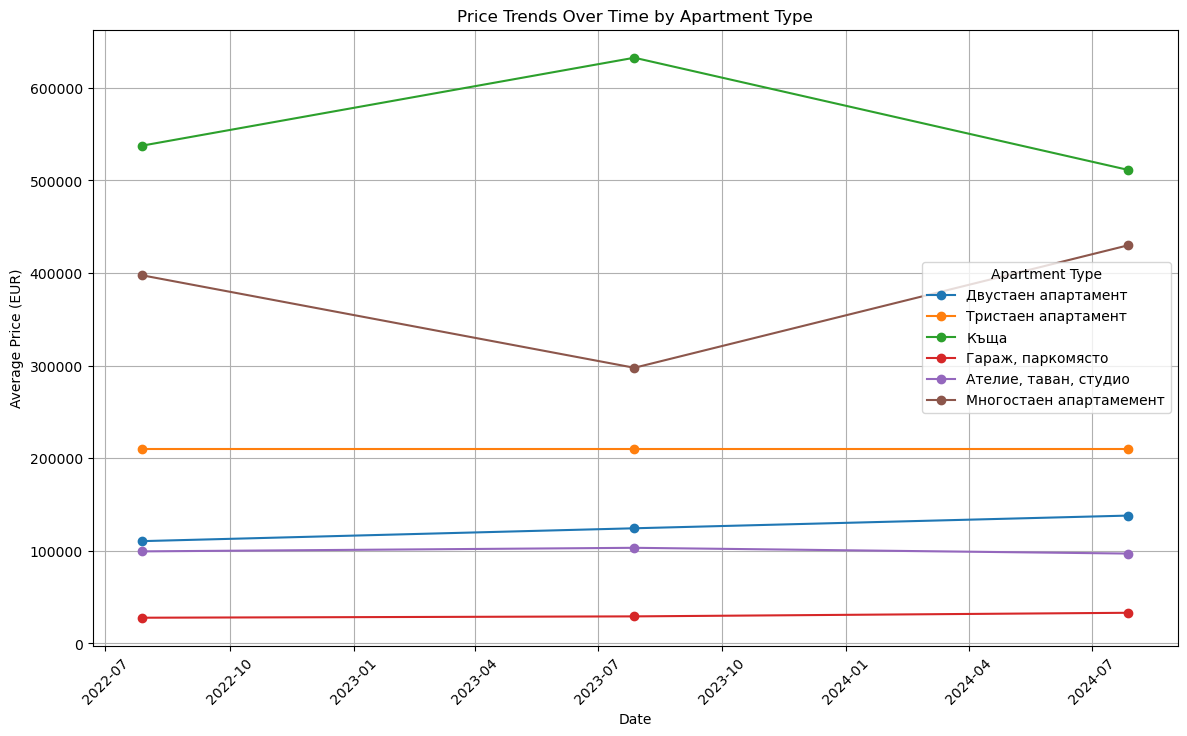

In [27]:
apartment_types = combined_df["Тип Апартамент"].unique()

plt.figure(figsize=(14, 8))

for apartment_type in apartment_types:
    # Filter the DataFrame by apartment type
    filtered_df = combined_df[combined_df["Тип Апартамент"] == apartment_type]
    
    # Group by date and calculate the mean price for each date
    price_over_time = filtered_df.groupby('Дата')['Цена'].median()
    
    # Plot the line for this apartment type
    plt.plot(price_over_time.index, price_over_time.values, marker='o', label=apartment_type)

plt.title('Price Trends Over Time by Apartment Type')
plt.xlabel('Date')
plt.ylabel('Average Price (EUR)')
plt.xticks(rotation=45)
plt.legend(title='Apartment Type')
plt.grid(True)
plt.show()

Let's see how many unique Ragions we have:

In [28]:
len(combined_df['Район'].unique())

100

And which they are:

In [29]:
combined_df['Район'].unique()

array(['Банишора', 'Белите Брези', 'Борово', 'Бояна', 'Бъкстон', 'Витоша',
       'Гевгелийски', 'Гео Милев', 'Горна Баня', 'Гоце Делчев',
       'Дианабад', 'Драгалевци', 'Дружба 1', 'Дружба 2', 'Дървеница',
       'Западен Парк', 'Захарна Фабрика', 'Зона Б18', 'Зона Б19',
       'Зона Б5', 'Иван Вазов', 'Изгрев', 'Изток', 'Илинден', 'Княжево',
       'Красна Поляна', 'Красно Село', 'Кръстова Вада', 'Лагера',
       'Левски', 'Левски В', 'Левски Г', 'Лозенец', 'Люлин 1', 'Люлин 10',
       'Люлин 2', 'Люлин 3', 'Люлин 4', 'Люлин 5', 'Люлин 6', 'Люлин 7',
       'Люлин 8', 'Люлин 9', 'Люлин Център', 'м-т Гърдова глава',
       'Малинова Долина', 'Манастирски ливади Запад',
       'Манастирски ливади Изток', 'Младост 1', 'Младост 1а', 'Младост 2',
       'Младост 3', 'Младост 4', 'Мотописта', 'Мусагеница', 'Надежда 1',
       'Надежда 2', 'Надежда 3', 'Надежда 4', 'Обеля', 'Обеля 1',
       'Обеля 2', 'Оборище', 'Овча Купел', 'Овча Купел 1', 'Овча Купел 2',
       'Павлово', 'Подуене', 

In [30]:
len(second_df['Район'].unique())

160

In [31]:
second_df['Район'].unique()

array(['7-ми 11-ти километър', 'Банишора', 'Белите брези', 'Бенковски',
       'Борово', 'Ботунец', 'Ботунец 2', 'Бояна', 'Бъкстон', 'Витоша',
       'Военна рампа', 'Враждебна', 'Връбница 1', 'Връбница 2',
       'Гевгелийски', 'Гео Милев', 'Горна баня', 'Горубляне',
       'Гоце Делчев', 'Градина', 'Дианабад', 'Докторски паметник',
       'Драгалевци', 'Дружба 1', 'Дружба 2', 'Дървеница',
       'Експериментален', 'Западен парк', 'Захарна фабрика', 'Зона Б-18',
       'Зона Б-19', 'Зона Б-5', 'Зона Б-5-3', 'Иван Вазов', 'Изгрев',
       'Изток', 'Илинден', 'Илиянци', 'Карпузица', 'Княжево',
       'Красна поляна 1', 'Красна поляна 2', 'Красна поляна 3',
       'Красно село', 'Кремиковци', 'Кръстова вада', 'Лагера', 'Левски',
       'Левски В', 'Левски Г', 'Летище София', 'Лозенец',
       'Люлин - център', 'Люлин 1', 'Люлин 10', 'Люлин 2', 'Люлин 3',
       'Люлин 4', 'Люлин 5', 'Люлин 6', 'Люлин 7', 'Люлин 8', 'Люлин 9',
       'Малашевци', 'Малинова долина', 'Манастирски ливади',
 

In [32]:
second_df['Едностайни - цена'].max()

180500.0

In [33]:
top_5_rows = second_df.nlargest(5, 'Едностайни - цена')  
top_5_rows

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
168,Докторски паметник,180500.0,4512.0,323000.0,3867.0,394250.0,3657.0,3779,2024-06-04
316,Докторски паметник,180500.0,4512.0,280250.0,3932.0,394250.0,3562.0,3895,2024-04-23
21,Докторски паметник,163400.0,4085.0,318250.0,4432.0,365750.0,3602.0,3735,2024-08-13
559,Яворов,152000.0,3800.0,165300.0,2405.0,204250.0,2389.0,2406,2024-01-16
1344,Докторски паметник,142500.0,4750.0,242231.0,4115.0,285000.0,3585.0,3762,2022-07-26


#### Let's plot and the second dataset:

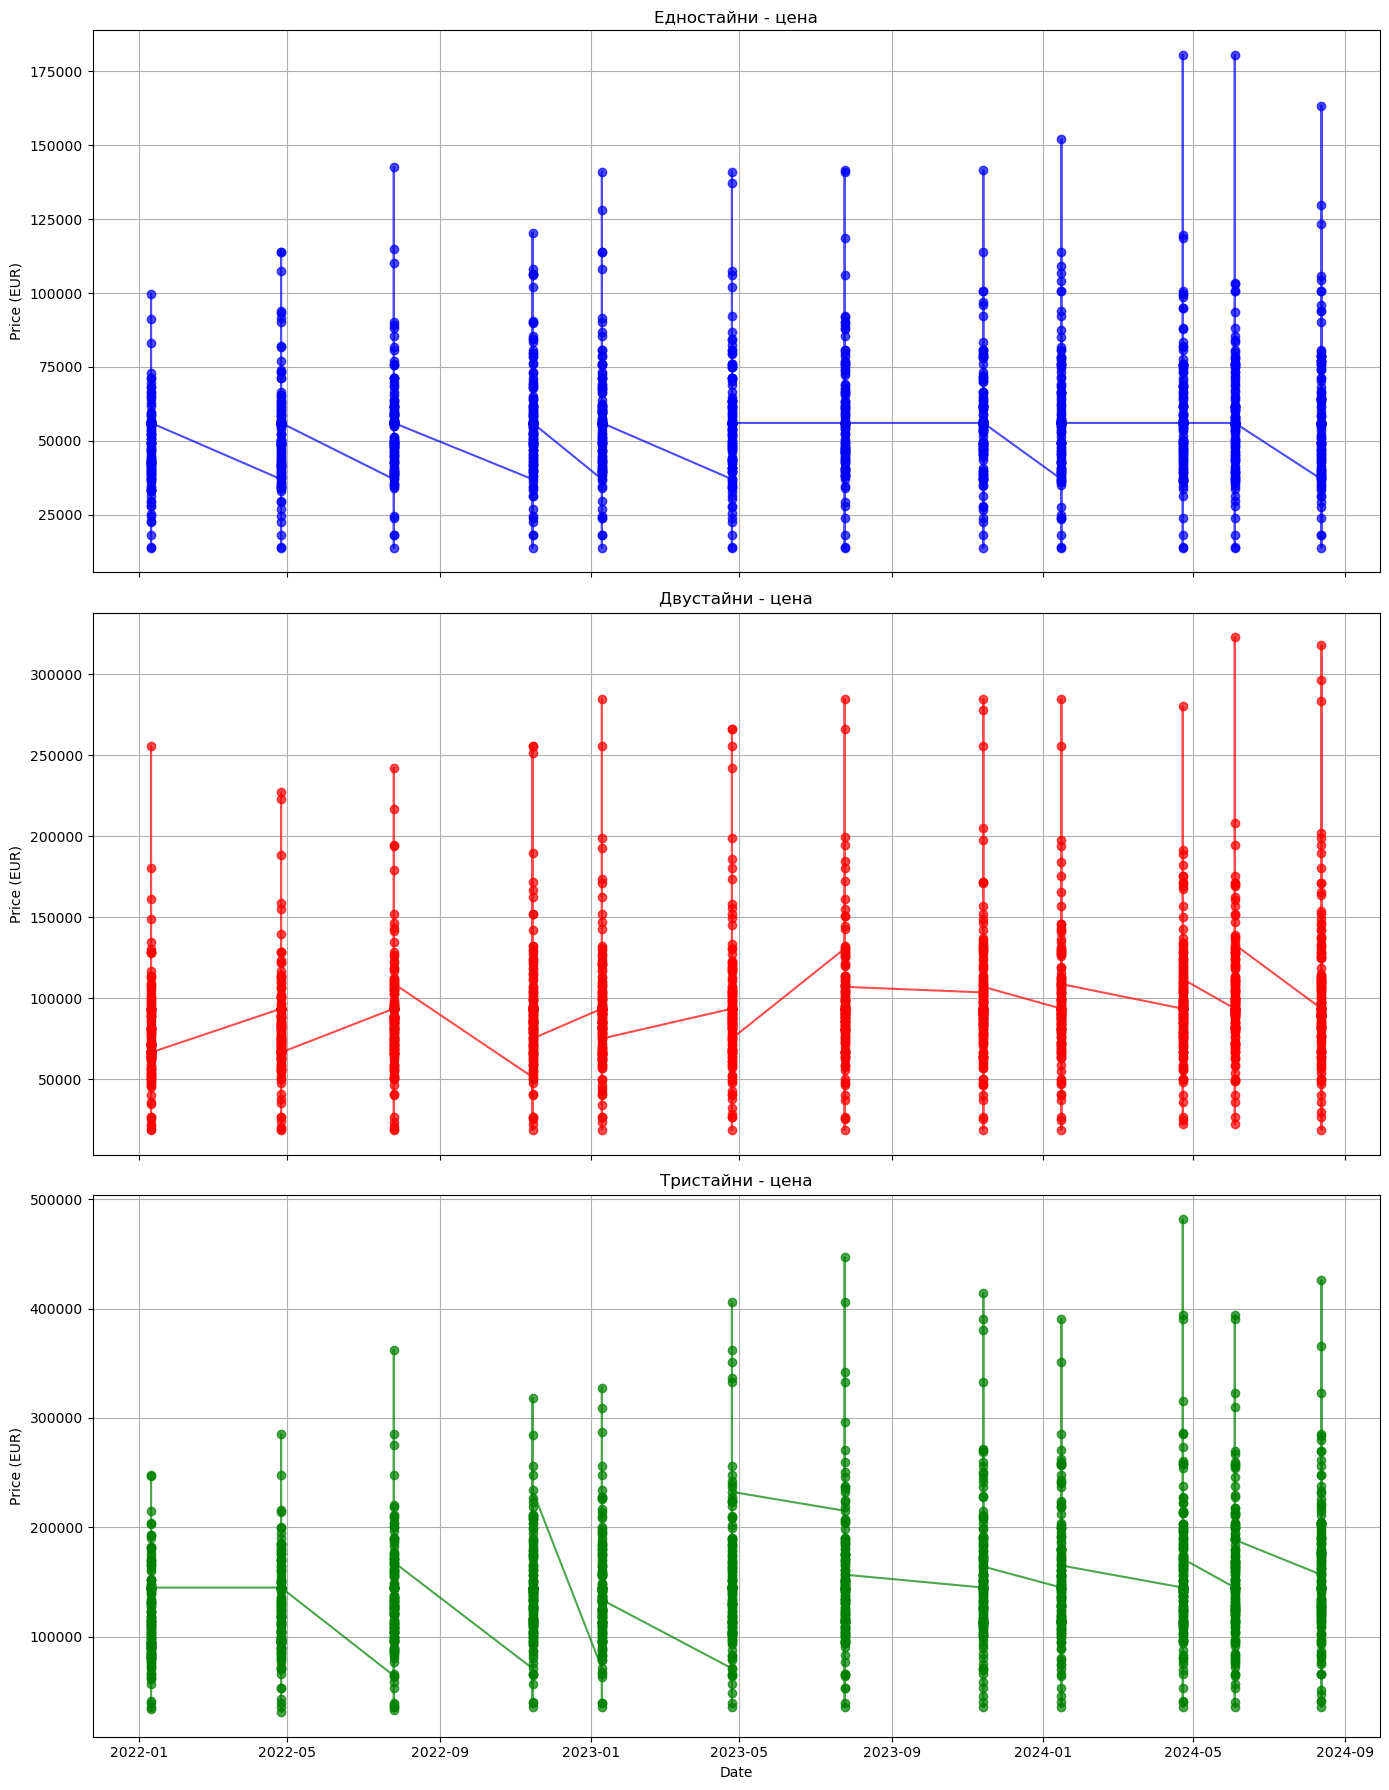

In [34]:
# Create a figure with 3 subplots arranged in a single column
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=True)

# Plotting 'Едностайни - цена'
axs[0].plot(
    second_df['Дата'], 
    second_df['Едностайни - цена'], 
    marker='o', 
    color='b', 
    alpha=0.7  # Adjust transparency level (0 to 1)
)
axs[0].set_title('Едностайни - цена')
axs[0].set_ylabel('Price (EUR)')
axs[0].grid(True)

# Plotting 'Двустайни - цена'
axs[1].plot(
    second_df['Дата'], 
    second_df['Двустайни - цена'], 
    marker='o', 
    color='r', 
    alpha=0.7  # Adjust transparency level (0 to 1)
)
axs[1].set_title('Двустайни - цена')
axs[1].set_ylabel('Price (EUR)')
axs[1].grid(True)

# Plotting 'Тристайни - цена'
axs[2].plot(
    second_df['Дата'], 
    second_df['Тристайни - цена'], 
    marker='o', 
    color='g', 
    alpha=0.7  # Adjust transparency level (0 to 1)
)
axs[2].set_title('Тристайни - цена')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price (EUR)')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

## Let's prepear the model and train it:

In [35]:
combined_df

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28
...,...,...,...,...,...,...
949,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28
950,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28
951,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28
952,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28


Extract date features:

In [36]:
# combined_df['Year'] = combined_df['Дата'].dt.year
# combined_df['Month'] = combined_df['Дата'].dt.month
# combined_df['Day'] = combined_df['Дата'].dt.day

In [37]:
# combined_df['Year']

Drop the original 'Дата' column:

In [38]:
# combined_df = combined_df.drop(columns=['Дата'])

Define features and target:

In [39]:
# features = ['Район', 'Тип Апартамент', 'Year', 'Month', 'Day']
# target = 'Цена'

# X = combined_df[features]
# y = combined_df[target]

Encode categorical variables:

In [40]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['Year', 'Month', 'Day']),
#         ('cat', OneHotEncoder(), ['Район','Тип Апартамент'])
#     ])

Create a pipeline with preprocessing and regression:

In [41]:
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

Split the data into training and testing sets:

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model:

In [43]:
# model.fit(X_train, y_train)

In [44]:
# # Make predictions and evaluate
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")

In [45]:
# # Calculate RMSE
# rmse = np.sqrt(mse)
# print(f"Root Mean Squared Error: {rmse:.2f}")

In [46]:
# # Assuming average price for calculation
# average_price = combined_df['Цена'].mean()
# percentage_rmse = (rmse / average_price) * 100
# print(f"RMSE as a percentage of the average price: {percentage_rmse:.2f}%")

In [47]:
# historical_min = combined_df['Цена'].min()
# historical_max = combined_df['Цена'].max()
# print(f"Historical Price Range: {historical_min} to {historical_max}")

In [48]:
# combined_df['Цена']

In [49]:
# rows_with_min_price = combined_df[combined_df['Цена'] == historical_min]

In [50]:
# rows_with_min_price

## Test and predict prices:

In [51]:
# Example of predicting future prices
# future_data = pd.DataFrame({
#     'Район': ['Център'],
#     # 'Цена / кв.м.': [3000],
#     # 'Валута': ['EUR'],
#     'Тип Апартамент': ['Многостаен апартамемент'],
#     'Year': [2025],
#     'Month': [8],
#     'Day': [13]
# })

# future_pred = model.predict(future_data)
# print(f"Predicted Future Price: {future_pred[0]:.2f}€")

In [52]:
# print(f"Future Data Input:\n{future_data}")

In [53]:
# # Example of predicting future prices
# future_data = pd.DataFrame({
#     'Район': ['Банишора'],
#     # 'Цена / кв.м.': [3000],
#     # 'Валута': ['EUR'],
#     'Тип Апартамент': ['Многостаен апартамемент'],
#     'Year': [2024],
#     'Month': [12],
#     'Day': [13]
# })

# future_pred = model.predict(future_data)
# print(f"Predicted Future Price: {future_pred[0]:.2f}€")

## Regression Model:

In [61]:
combined_df

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата,Year,Month,Day
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28,2022,7,28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28,2022,7,28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28,2022,7,28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28,2022,7,28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28,2022,7,28
...,...,...,...,...,...,...,...,...,...
949,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28,2024,7,28
950,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28,2024,7,28
951,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28,2024,7,28
952,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28,2024,7,28


In [165]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Район           954 non-null    object        
 1   Цена            954 non-null    float64       
 2   Цена / кв.м.    954 non-null    float64       
 3   Валута          954 non-null    object        
 4   Тип Апартамент  954 non-null    object        
 5   Дата            954 non-null    datetime64[ns]
 6   Year            954 non-null    int32         
 7   Month           954 non-null    int32         
 8   Day             954 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 56.0+ KB


In [167]:
combined_df.describe()

,Цена,Цена / кв.м.,Дата,Year,Month,Day
count,9.540000e+02,954.000000,954,954.000000,954.0,954.0
mean,2.495837e+05,1843.112956,2023-08-14 13:36:36.226415104,2023.047170,7.0,28.0
min,6.500000e+03,17.400000,2022-07-28 00:00:00,2022.000000,7.0,28.0
25%,1.142454e+05,1479.210000,2022-07-28 00:00:00,2022.000000,7.0,28.0
50%,1.701621e+05,1776.785000,2023-07-28 00:00:00,2023.000000,7.0,28.0
75%,2.810798e+05,2140.805000,2024-07-28 00:00:00,2024.000000,7.0,28.0
max,3.000000e+06,7741.380000,2024-07-28 00:00:00,2024.000000,7.0,28.0
std,2.700700e+05,626.005076,NaN,0.807154,0.0,0.0


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

combined_df['Year'] = combined_df['Дата'].dt.year
combined_df['Month'] = combined_df['Дата'].dt.month
combined_df['Day'] = combined_df['Дата'].dt.day

# Encode categorical variables
# combined_df = pd.get_dummies(combined_df, columns=['Район', 'Тип Апартамент'])

# Define features and target
X = combined_df.drop(columns=['Цена / кв.м.', 'Дата', 'Валута'], axis=1) 
y = combined_df['Цена / кв.м.']  # Target variable


from sklearn.preprocessing import LabelEncoder

label_encoder_region = LabelEncoder()
label_encoder_apartment_type = LabelEncoder()

X['Район'] = label_encoder_region.fit_transform(X['Район'])
X['Тип Апартамент'] = label_encoder_apartment_type.fit_transform(X['Тип Апартамент'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
X_train.shape, y_test.shape

((667, 6), (287,))

In [172]:
X_test.shape, y_train.shape

((287, 6), (667,))

In [173]:
len(combined_df['Тип Апартамент'].unique())

6

In [118]:
X_train

,Район,Цена,Тип Апартамент,Year,Month,Day
292,3,162233.00,2,2023,7,28
891,55,32900.00,0,2024,7,28
736,27,315092.78,5,2024,7,28
109,25,421500.00,5,2022,7,28
77,84,173050.00,2,2022,7,28
...,...,...,...,...,...,...
106,22,214656.36,5,2022,7,28
270,37,190996.67,4,2022,7,28
860,38,44000.00,1,2024,7,28
435,55,215677.05,5,2023,7,28


In [119]:
model = LinearRegression()

In [181]:
model.fit(X_train, y_train)

LinearRegression()

In [182]:
y_pred = model.predict(X_test)

### Print model performance

In [183]:
mse = mean_squared_error(y_test, y_pred)
mse

361313.1488254969

In [184]:
[x for x in X]

['Район', 'Цена', 'Тип Апартамент', 'Year', 'Month', 'Day']

In [186]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])
cdf

,Coef
Район,0.400926
Цена,0.000813
Тип Апартамент,46.287872
Year,104.684087
Month,0.000000
Day,0.000000


In [163]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error (MSE): %.2f" % mse)
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))

Coefficients: [4.00926284e-01 8.12908030e-04 4.62878715e+01 1.04684087e+02
 0.00000000e+00 0.00000000e+00]
Intercept: -210315.93591144576
Mean squared error (MSE): 247728.43
Coefficient of determination (R^2): 0.54


### Prediction results

In [189]:
predictions = model.predict(X_test)

In [190]:
predictions

array([1750.68769183, 1839.39383931, 1804.70040078, 1944.07792623,
       1922.38083838, 2219.76097443, 2094.98754327, 1537.72001041,
       2300.23395829, 1872.9110702 , 1428.80262176, 1539.77991914,
       1547.53523397, 2183.63678977, 1807.60635224, 1585.7867115 ,
       1662.43326291, 1670.19373346, 1807.75261896, 1914.9282857 ,
       1956.9735337 , 1828.94517048, 1760.22967186, 1686.11261913,
       1534.811921  , 1777.82094491, 1528.81671619, 2021.42489425,
       1767.09400383, 1537.75367292, 1907.69718555, 1765.20986189,
       1736.7505311 , 1754.21497581, 1579.60087932, 1985.17116354,
       1661.65627825, 1784.10376819, 2044.07519549, 2148.75928242,
       1527.54371103, 1651.77444794, 1534.20011755, 1819.90973642,
       1633.22389514, 1715.39755576, 1421.45287664, 1880.2953017 ,
       1578.62717821, 1780.1590112 , 1641.19677333, 1772.91549362,
       1647.08029418, 1665.05496756, 1979.41164758, 1938.31235138,
       1632.79292199, 1673.4582839 , 1934.39529835, 1957.31744

In [196]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))

Mean Absolute Error:  396.14418337543447


Text(0.5, 1.0, 'Evaluation of the model')

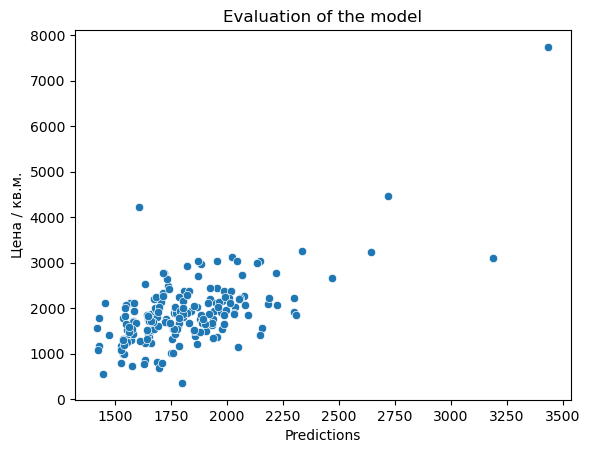

In [194]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of the model")

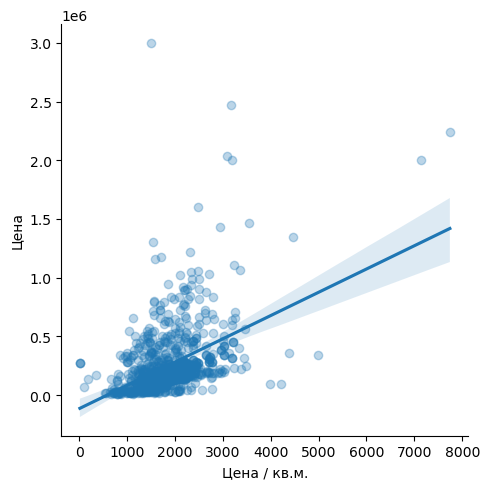

In [204]:
label_encoder_reg = LabelEncoder()
combined_df['Район'] = label_encoder_reg.fit_transform(combined_df['Район'])

sns.lmplot(x='Цена / кв.м.', y='Цена', data=combined_df, scatter_kws={'alpha': 0.3})

## Residuals

In [206]:
residuals = y_test - predictions

In [209]:
# sns.displot(residuals)

In [129]:
# Creating a future dataset for prediction
# Example: Predicting for 2025 with specific assumptions for features
future_data = {
    'Район': label_encoder_region.transform(['Банишора', 'Белите Брези']),  # Encode regions
    'Цена': 200000,
    'Тип Апартамент': label_encoder_apartment_type.transform(['Двустаен апартамент', 'Тристаен апартамент']),  # Encode apartment types
    'Year': [2025] * 2,  # Assuming 2 predictions for example purposes
    'Month': [1, 1],  # Predicting for January 2025
    'Day': [1, 1],  # 1st of January 2025  
}

# Convert to DataFrame
future_X = pd.DataFrame(future_data)

# Make predictions
future_predictions = model.predict(future_X)

# Display predictions
for i, prediction in enumerate(future_predictions):
    print(f"Prediction for {future_data['Район'][i]} - {future_data['Тип Апартамент'][i]}: {prediction:.2f} per square meter")

Prediction for 0 - 2: 1924.50 per square meter
Prediction for 1 - 5: 2063.76 per square meter


In [130]:
# Create reverse mappings
region_reverse_mapping = {idx: label for idx, label in enumerate(label_encoder_region.classes_)}
apartment_type_reverse_mapping = {idx: label for idx, label in enumerate(label_encoder_apartment_type.classes_)}

# Encoded values
encoded_regions = [0, 1]  # Example encoded values for future predictions
encoded_apartment_types = [2, 5]  # Example encoded values for future predictions

# Translate encoded values to original labels
decoded_regions = [region_reverse_mapping[encoded] for encoded in encoded_regions]
decoded_apartment_types = [apartment_type_reverse_mapping[encoded] for encoded in encoded_apartment_types]

# Example predictions
future_predictions = [1924.50, 2063.76]

# Display predictions with original labels
for i, prediction in enumerate(future_predictions):
    region_label = decoded_regions[i]
    apartment_type_label = decoded_apartment_types[i]
    print(f"Prediction for {region_label} - {apartment_type_label}: {prediction:.2f} per square meter")

Prediction for Банишора - Двустаен апартамент: 1924.50 per square meter
Prediction for Белите Брези - Тристаен апартамент: 2063.76 per square meter


In [140]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.3261762030034778

In [143]:
combined_df[combined_df["Район"] == "Белите Брези"]

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата,Year,Month,Day
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28,2022,7,28
89,Белите Брези,266593.75,2109.54,EUR,Тристаен апартамент,2022-07-28,2022,7,28
211,Белите Брези,35000.00,1944.44,EUR,"Гараж, паркомясто",2022-07-28,2022,7,28
249,Белите Брези,452333.34,1794.97,EUR,Многостаен апартамемент,2022-07-28,2022,7,28
292,Белите Брези,162233.00,2015.32,EUR,Двустаен апартамент,2023-07-28,2023,7,28
385,Белите Брези,266593.75,2109.54,EUR,Тристаен апартамент,2023-07-28,2023,7,28
513,Белите Брези,44924.00,1826.18,EUR,"Гараж, паркомясто",2023-07-28,2023,7,28
567,Белите Брези,297666.34,1704.20,EUR,Многостаен апартамемент,2023-07-28,2023,7,28
622,Белите Брези,249900.00,2108.86,EUR,Двустаен апартамент,2024-07-28,2024,7,28
714,Белите Брези,266593.75,2109.54,EUR,Тристаен апартамент,2024-07-28,2024,7,28


<Axes: xlabel='Цена / кв.м.'>

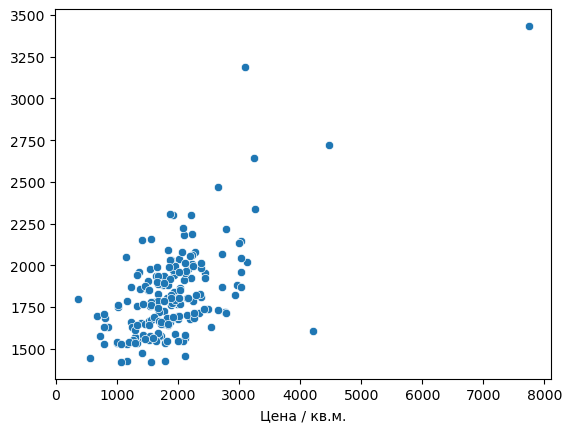

In [188]:
sns.scatterplot(x=y_test, y=y_pred)

## Train model for second_df

In [ ]:
second_df

In [ ]:
df_one_bed = second_df[['Район', 'Дата', 'Едностайни - €/кв.м', 'Едностайни - цена' ]].copy()

plt.figure(figsize=(14, 7))
top_regions = df_one_bed['Район'].value_counts().nlargest(5).index
df_filtered = df_one_bed[df_one_bed['Район'].isin(top_regions)]

sns.scatterplot(x="Дата", y="Едностайни - €/кв.м", data=df_filtered, hue="Район", palette="coolwarm")
plt.title('One-Bedroom Apartment Prices Over Time by Selected Regions')
plt.show()

In [ ]:
df_two_bed = second_df[['Район', 'Дата', 'Двустайни - €/кв.м', 'Двустайни - цена']].copy()

plt.figure(figsize=(14, 7))
top_regions = df_two_bed['Район'].value_counts().nlargest(5).index
df_filtered = df_two_bed[df_two_bed['Район'].isin(top_regions)]

sns.scatterplot(x="Дата", y="Двустайни - €/кв.м", data=df_filtered, hue="Район", palette="coolwarm")
plt.title('Two-Bedroom Apartment Prices Over Time by Selected Regions')
plt.show()

In [ ]:
df_two_bed[df_two_bed['Район'] == 'Полигона']

In [ ]:
df_one_bed

In [ ]:
df_one_bed['Year'] = df_one_bed['Дата'].dt.year
df_one_bed['Month'] = df_one_bed['Дата'].dt.month
df_one_bed.drop(["Дата"], axis=1, inplace=True)

X = df_one_bed.drop(["Едностайни - €/кв.м"], axis=1)
y = df_one_bed["Едностайни - €/кв.м"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Район'] = label_encoder.fit_transform(X['Район'])

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
# y_predict
model.coef_

In [ ]:
model.intercept_

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Combine X_train and X_test for encoding
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)

# Step 2: Apply One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Район'])
    ], remainder='passthrough')

# Apply transformations
X_combined_transformed = preprocessor.fit_transform(X_combined)

# Step 3: Split the Data Back into Training and Test Sets
# Determine the indices for splitting
train_size = X_train.shape[0]
X_train_transformed = X_combined_transformed[:train_size]
X_test_transformed = X_combined_transformed[train_size:]

# Step 4: Train and Evaluate the Model
model = LinearRegression()

# Train the model
model.fit(X_train_transformed, y_train)

# Make predictions
y_pred = model.predict(X_test_transformed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Prepare the data
df_one_bed = second_df[['Район', 'Дата', 'Едностайни - €/кв.м', 'Едностайни - цена']].copy()
df_one_bed['Year'] = df_one_bed['Дата'].dt.year
df_one_bed['Month'] = df_one_bed['Дата'].dt.month
df_one_bed.drop(["Дата"], axis=1, inplace=True)

X = df_one_bed.drop(["Едностайни - €/кв.м"], axis=1)
y = df_one_bed["Едностайни - €/кв.м"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Район'])
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Extract the model and preprocessor
model = pipeline.named_steps['model']
preprocessor = pipeline.named_steps['preprocessor']

# Get feature names from preprocessor
feature_names = preprocessor.transformers_[0][1].get_feature_names_out()

# Combine feature names with the numerical features
numerical_features = X.columns.difference(['Район'])  # Get numerical feature names
all_feature_names = np.concatenate([feature_names, numerical_features])

# Ensure that the number of coefficients matches the number of feature names
assert len(model.coef_) == len(all_feature_names), "The number of coefficients does not match the number of feature names."

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': model.coef_
})

# Print feature importance
print(feature_importance_df)


In [ ]:
# from sklearn.metrics import make_scorer, mean_absolute_error
# from sklearn.model_selection import cross_val_score

# # Define scoring function (mean absolute error in this case)
# scoring = make_scorer(mean_absolute_error)

# # Perform cross-validation
# scores = cross_val_score(pipeline, X, y, cv=5, scoring=scoring)

# # Print the cross-validation results
# print(f'Cross-Validation MAE Scores: {scores}')
# print(f'Mean MAE: {scores.mean()}')
# print(f'Standard Deviation of MAE: {scores.std()}')

In [ ]:

# # Preprocessor setup
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['Year', 'Month']),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), ['Район'])
#     ])

# # Create a pipeline with preprocessing and Random Forest model
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

# # Fit the model
# pipeline.fit(X_train, y_train)

# # Make predictions
# y_pred = pipeline.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
# second_df.info()

In [57]:
# train_data = X_train.join(y_train)

In [ ]:
# train_data.hist(figsize=(15, 8))
# plt.show()

In [ ]:
# train_data.corr()

In [ ]:
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# np.log(train_data["Едностайни - цена"] + 1)

In [ ]:
# train_data['Район'].value_counts()

In [ ]:
# dummies = pd.get_dummies(train_data['Район']).astype(int)
# dummies.astype(int)

In [ ]:
# train_data = train_data.join(pd.get_dummies(train_data['Район']).astype(int)).drop(['Район'], axis=1)

In [ ]:
# train_data

In [ ]:
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# subset_columns = ['Едностайни - цена', 'Двустайни - цена', 'Тристайни - цена', 'Общо - €/кв.м']
# plt.figure(figsize=(10,6))
# sns.heatmap(train_data[subset_columns].corr(), annot=True, cmap="YlGnBu")
# plt.show()

In [219]:
# plt.figure(figsize=(15,8))
# sns.scatterplot(x="Двустайни - цена", y="Двустайни - €/кв.м", data=train_data, hue="Двустайни - цена" , palette="coolwarm")

In [220]:
# plt.figure(figsize=(15,8))
# sns.scatterplot(x="Двустайни - цена", y="Двустайни - €/кв.м", data=train_data, hue="Дата", palette="coolwarm")
# plt.show()

In [228]:
combined_df

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата,Район_encoded,Тип Апартамент_encoded
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28,1,2
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28,3,2
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28,5,2
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28,6,2
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28,7,2
...,...,...,...,...,...,...,...,...
949,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28,86,4
950,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28,92,4
951,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28,93,4
952,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28,94,4


In [250]:
x = combined_df['Район_encoded']
y = combined_df['Цена / кв.м.']

In [247]:
combined_df[combined_df['Цена / кв.м.'] > 4000]

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата,Район_encoded,Тип Апартамент_encoded


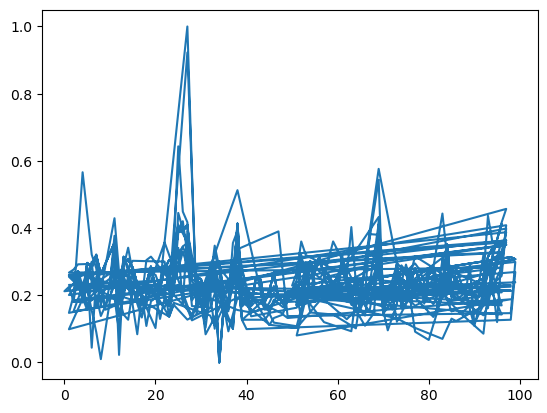

In [251]:
plt.plot(x, y)

In [243]:
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns to normalize
numerical_cols = ['Цена', 'Цена / кв.м.']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data
combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

# Displaying the normalized data
print(combined_df.head())


          Район      Цена  Цена / кв.м. Валута       Тип Апартамент  \
0      Банишора -0.516367     -0.212527    EUR  Двустаен апартамент   
1  Белите Брези -0.375873      0.169252    EUR  Двустаен апартамент   
2        Борово -0.398888      0.442652    EUR  Двустаен апартамент   
3         Бояна -0.303694      0.071885    EUR  Двустаен апартамент   
4       Бъкстон -0.517987      0.042126    EUR  Двустаен апартамент   

         Дата  Район_encoded  Тип Апартамент_encoded  
0  2022-07-28              1                       2  
1  2022-07-28              3                       2  
2  2022-07-28              5                       2  
3  2022-07-28              6                       2  
4  2022-07-28              7                       2  
